<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Assignment/Assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import glob
import cv2

In [ ]:
train_path = '/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training'
test_path = '/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Test'

train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), batch_size=32, class_mode='binary', subset='training')

validation_generator = train_datagen.flow_from_directory(train_path, target_size=(227,227), batch_size=32, class_mode='binary', subset='validation')

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.


In [ ]:
train_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/*/*.jpg')
train_Fire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/Fire/*.jpg')
train_noFire_image_names = glob.glob('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training/No_Fire/*.jpg')

print("Total number of training images: ", len(train_image_names))
print("number of Fire images: ", len(train_Fire_image_names))
print("number of No Fire images: ", len(train_noFire_image_names))

Total number of training images:  39375
number of Fire images:  25018
number of No Fire images:  14357


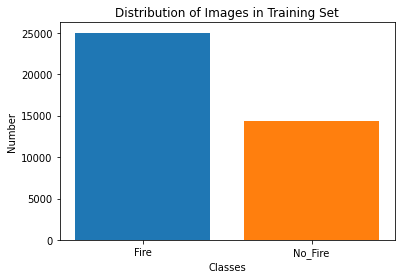

In [ ]:
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training')[0], len(train_Fire_image_names))
plt.bar(os.listdir('/content/drive/MyDrive/Assignment/Fire-vs-NoFire/Training')[1], len(train_noFire_image_names))
plt.xlabel("Classes")
plt.ylabel("Number")
plt.title("Distribution of Images in Training Set")
plt.show()

In [ ]:
type(train)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
#print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32,)
Image Size of first image :  (227, 227, 3)


Text(0.5, 1.0, '1.0')

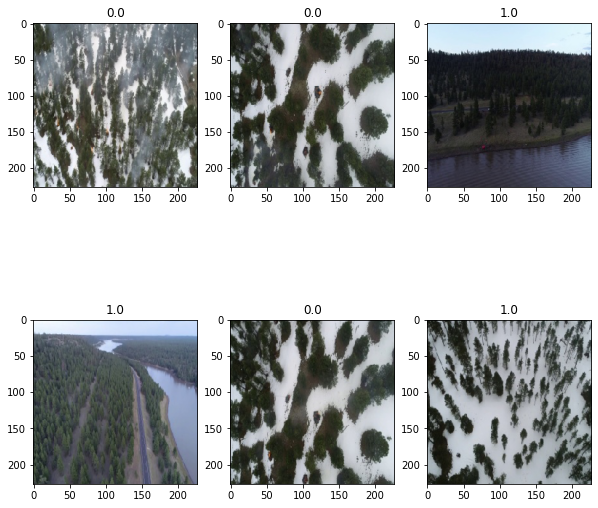

In [53]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][1])
axs[0][1].set_title(train[0][1][1])
axs[0][2].imshow(train[0][0][14])
axs[0][2].set_title(train[0][1][14])
axs[1][0].imshow(train[0][0][17])
axs[1][0].set_title(train[0][1][17])
axs[1][1].imshow(train[0][0][19])
axs[1][1].set_title(train[0][1][19])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(1,activation='sigmoid',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model
 

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation_10 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])

In [43]:
history = alex.fit_generator(train, steps_per_epoch=100, epochs=3,
                              validation_data=validation_generator, validation_steps=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
100/100 [==============================] - 4198s 42s/step - loss: 0.7951 - accuracy: 0.9203 - val_loss: 0.0158 - val_accuracy: 0.9962
Epoch 2/3
100/100 [==============================] - 3153s 32s/step - loss: 0.1191 - accuracy: 0.9559 - val_loss: 0.1172 - val_accuracy: 0.9584
Epoch 3/3
100/100 [==============================] - 2348s 24s/step - loss: 0.0870 - accuracy: 0.9656 - val_loss: 0.2944 - val_accuracy: 0.9638


Training accuracy:  0.965624988079071
Training loss:  0.0870412290096283
Validation accuracy:  0.9637500047683716
Validation loss:  0.29443973302841187


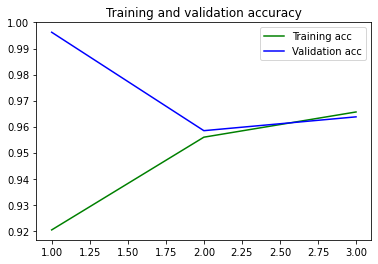

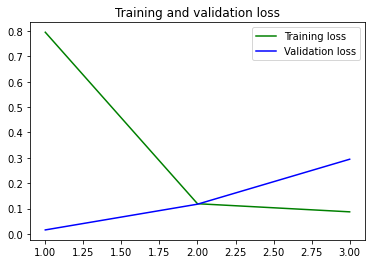

In [49]:
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print("Training accuracy: ", acc)
print("Training loss: ", loss)

print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

# Plotting the graphs to visualize the trend of accuracy and loss

epochs = range(1, len(history.history['accuracy'])+1)

plt.plot(epochs, history.history['accuracy'], 'g', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, history.history['loss'], 'g', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Next we will evaluate our model on test data

In [50]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(test_path, target_size=(227,227), batch_size=32, class_mode='binary')

Found 8617 images belonging to 2 classes.


In [51]:
preds = alex.evaluate_generator(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


KeyboardInterrupt: ignored